回歸

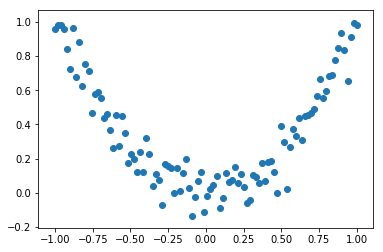

0.14658847


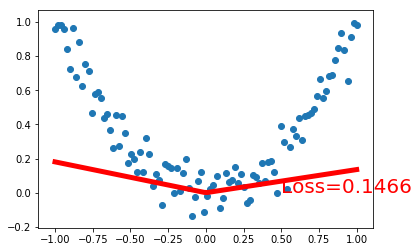

0.040600087


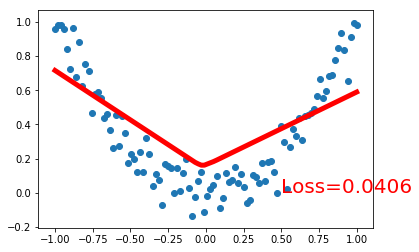

0.027838955


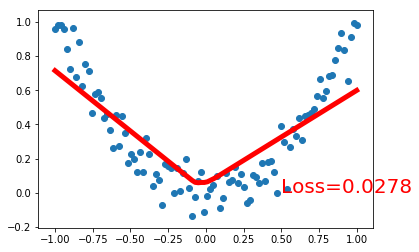

0.021524865


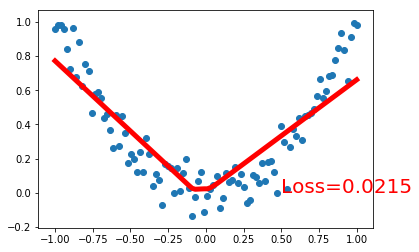

0.017927932


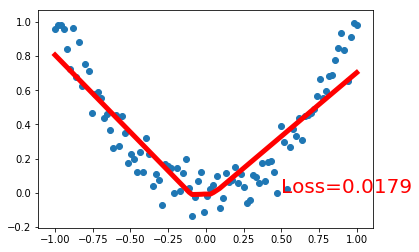

0.015934508


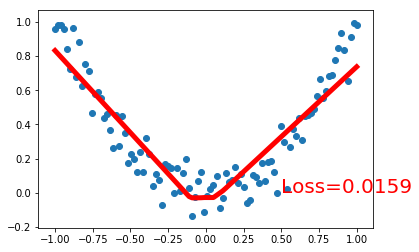

0.0147760045


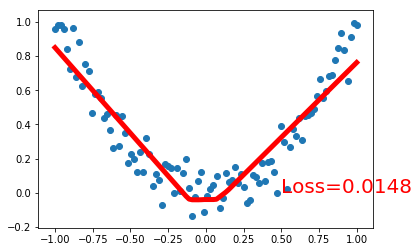

0.013982232


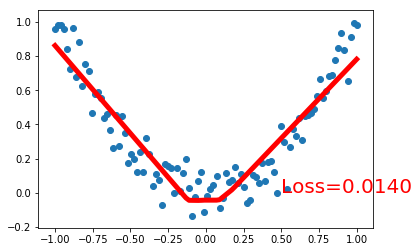

0.013317714


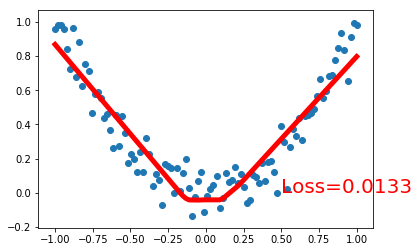

0.012705233


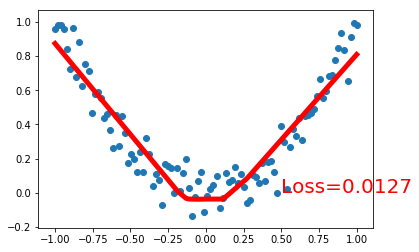

0.012227084


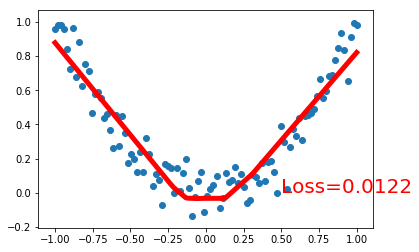

0.011778253


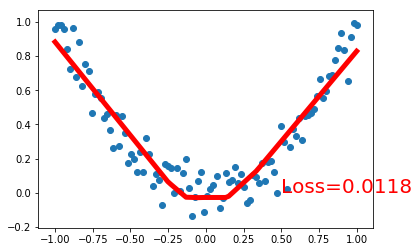

0.011259889


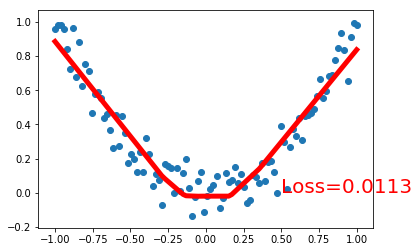

0.010829338


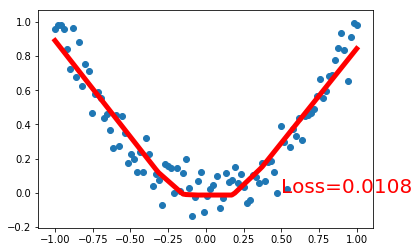

0.010435873


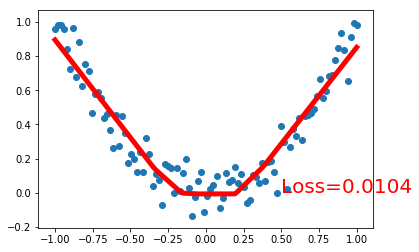

0.01003122


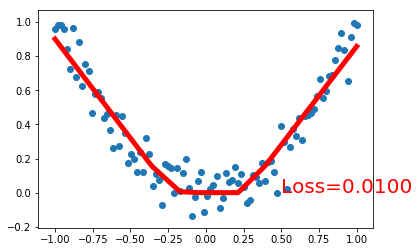

0.009698791


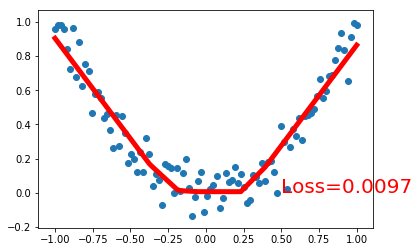

0.009375944


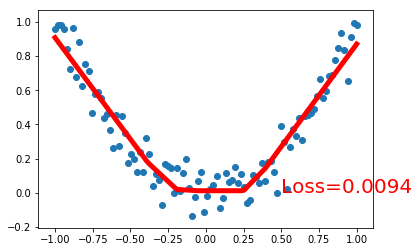

0.009058224


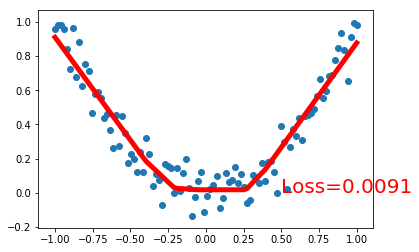

0.008799938


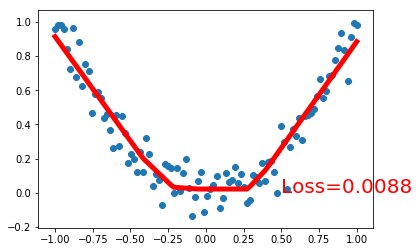

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



# data
x = np.linspace(-1, 1, 100)[:, np.newaxis]         
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                         

# plot data
plt.scatter(x, y)
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

#layers 2017
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)          # 隱藏層
output = tf.layers.dense(l1, 1)                     # 輸出層


loss = tf.losses.mean_squared_error(tf_y, output)   #loss 誤差
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)  #訓練
train_op = optimizer.minimize(loss)              #訓練

sess = tf.Session()                                
sess.run(tf.global_variables_initializer())         # initialize 


plt.ion() #連續輸出

#

for step in range(100):
   
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step % 5 == 0:
        print(l)
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1) #作圖中暫停0.1秒

plt.show()

分類

In [93]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(1)
np.random.seed(1)

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

tf_x = tf.placeholder(tf.float32,[None,784])     # input x
tf_y = tf.placeholder(tf.float32, [None,10])     # input y



output = tf.layers.dense(tf_x, 10)                     # output layer                     

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)            # compute cost
accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

sess = tf.Session()                                                                 # control training and others
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)     # initialize var in graph

plt.ion()  
for step in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: batch_xs, tf_y: batch_ys})
    if step % 50 == 0:
                print(acc)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.09
0.5921569
0.6980198
0.7444371
0.76925373
0.785498
0.7989701
0.8086325
0.816384
0.82348114
0.8285828
0.8331942
0.8373378
0.84089094
0.8442796
0.8465646
0.84882647
0.85123384
0.852919
0.85504735
